In [ ]:
# Index
 - Download dataset
 - Sneak-Peak on dataset
 - Creating model
 - Compile model
 - Preprocessing data using keras 
 - Train or Fit model
 - Evaluating Model
 - Visualizing the training process
 - Save and load model
 - Test a single image

# Download  dataset

In [1]:
#!wget --no-check-certificate \
    #https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
import tensorflow as tf
visible_devices = tf.config.get_visible_devices()
for devices in visible_devices:
  print(devices)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [ ]:
#!unzip -qq cats_and_dogs_filtered.zip

# Sneak-Peak on dataset

In [21]:
import os 
print(os.getcwd())

C:\Users\DELL\mnist


In [22]:
# !sudo apt-get install tree
!tree -L 2 cats_and_dogs_filtered 

Too many parameters - 2


In [59]:
import os

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(train_cats_dir)
print(train_dogs_dir)
print(train_dir)
print(os.listdir(train_dir))
print(len(validation_dir))

cats_and_dogs_filtered\train\cats
cats_and_dogs_filtered\train\dogs
cats_and_dogs_filtered\train
['cats', 'dogs']
33


In [11]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [12]:
import matplotlib.pyplot as plt
from matplotlib import image
import random

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

number_image_to_take = 4
cat_images = [os.path.join(train_cats_dir, file_name)
                for file_name in random.sample(os.listdir(train_cats_dir), number_image_to_take)]

dog_images = [os.path.join(train_dogs_dir, file_name)
                for file_name in random.sample(os.listdir(train_dogs_dir), number_image_to_take)]

print('cats:', cat_images)
print('dogs:', dog_images)
images = cat_images + dog_images
print('total image', len(images))



cats: ['cats_and_dogs_filtered\\train\\cats\\cat.113.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.467.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.530.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.268.jpg']
dogs: ['cats_and_dogs_filtered\\train\\dogs\\dog.746.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.347.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.2.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.53.jpg']
total image 8


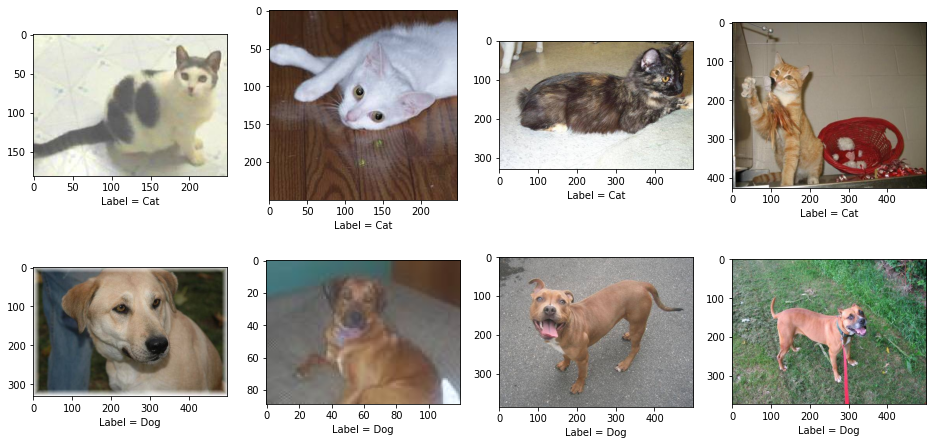

In [28]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(images):
  plt.subplot(nrows, ncols, i+1)
  img = image.imread(img_path)
  plt.imshow(img)
  if i < number_image_to_take:
    plt.xlabel('Label = Cat')
  else:
    plt.xlabel('Label = Dog')
  #plt.axis("off")
plt.show()

# Creating model

In [51]:
from warnings import filterwarnings
filterwarnings('ignore')
#import tensorflow as tf
#from tf.keras import keras 
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import adam_v2

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [46]:
from keras.models import Model 
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Input

inputs = Input(shape = (128, 128, 3))
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2), strides = 2)(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides = 2)(x)
#x = Dropout(rate=0.25)(x) ##extra

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(units = 2, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs= outputs)

# Compile model

In [14]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Preprocessing data using keras 

In [52]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,               # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fit model

In [53]:
batch_size = 32
print(len(validation_generator)//batch_size)
print(len(validation_dir))

1
33


In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(
      train_generator,
      steps_per_epoch=(2000//32),  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=(1000//32),  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/15


InvalidArgumentError:  Input to reshape is a tensor with 921600 values, but the requested shape requires a multiple of 6272
	 [[node sequential_1/flatten_6/Reshape (defined at \AppData\Local\Temp/ipykernel_19204/2704449079.py:1) ]] [Op:__inference_train_function_21381]

Function call stack:
train_function


# Evaluating Model

In [40]:
batch = next(validation_generator)
print('type of batch :', type(batch))
print('batch length  :', len(batch))
print('type batch[0] :', type(batch[0]))
print('type batch[1] :', type(batch[1]))

print('shape batch[0]:', batch[0].shape)
print('shape batch[1]:', batch[1].shape)

# evaluate model
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

type of batch : <class 'tuple'>
batch length  : 2
type batch[0] : <class 'numpy.ndarray'>
type batch[1] : <class 'numpy.ndarray'>
shape batch[0]: (32, 64, 64, 3)
shape batch[1]: (32, 2)
Accuracy: 62.300


# Visualizing the training process

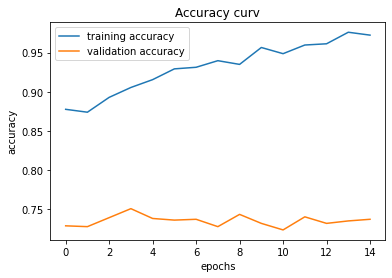

In [31]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy curv')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

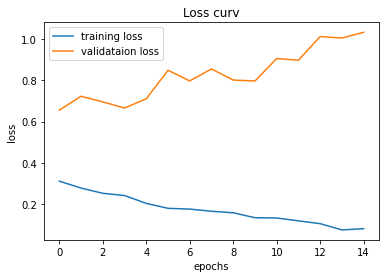

In [32]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validataion loss')
plt.title('Loss curv')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Save and Load model

In [22]:
import os

model_name = 'cat_vs_dog_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
#!ls -ltr

model saved to C:\Users\DELL\mnist


In [23]:
from keras.models import load_model

loaded_model = load_model(model_name)
# model.summary()

# Test a single image 

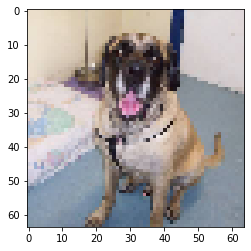

In [24]:
image_index = 10
test_image = batch[0][image_index]
plt.imshow(test_image)
plt.show()

In [25]:
test_image = test_image.reshape(1, 64, 64, 3) # make image batch

pred = loaded_model.predict(test_image)       # prediction

print('pred           :', pred)
print('pred lenght    :', len(pred[0]))
best_prediction = pred.argmax()
print('best_prediction:', best_prediction)

label = 'Cat' if best_prediction == 0 else 'Dog'
print('Label = {} Confident = {}'.format(label, pred[0][best_prediction]))

pred           : [[0.05535832 0.94555604]]
pred lenght    : 2
best_prediction: 1
Label = Dog Confident = 0.9455560445785522
